## erosion followed by dilation

In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [84]:
img_binary = plt.imread(r'j.png')

In [86]:
img_binary.dtype

dtype('float32')

In [88]:
K_r = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)) # rectangular kernel with 5 x 5 dimensions
K_e = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)) # ellipse
K_c = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5)) # cross

### adding noise to original image

In [91]:
im_bool = np.array(img_binary[:,:,0],dtype = bool) # converting image to bool image

In [93]:
im_bool.dtype

dtype('bool')

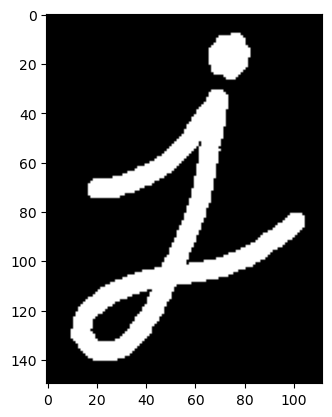

In [95]:
plt.imshow(im_bool,cmap='gray')

#### creating noise

In [98]:
N = np.random.rand(im_bool.shape[0],im_bool.shape[1])

In [100]:
N_binary = N> 0.98

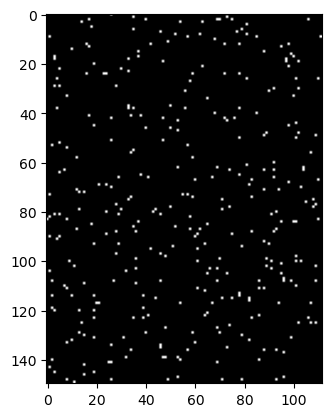

In [102]:
plt.imshow(N_binary,cmap = 'gray')

In [104]:
img_N = im_bool | N_binary  # combining image and noise

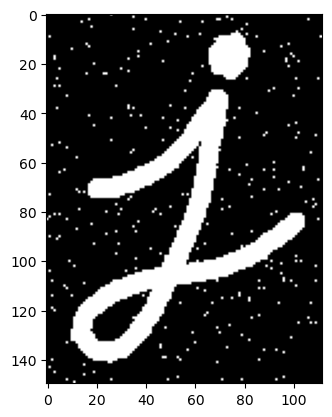

In [106]:
plt.imshow(img_N, cmap = 'gray')

## opening image with built in function

In [109]:
O_r = cv2.morphologyEx(np.float32(img_N),cv2.MORPH_OPEN,K_r) # opening image with a rectangular kernel

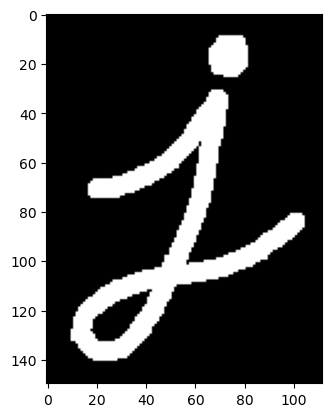

In [111]:
plt.imshow(O_r, cmap = 'gray')

In [117]:
plt.imsave('j_opened.png',O_r,cmap='gray')

### all noise has been removed and image has been restored

### doing erosion and dilation separately to open image

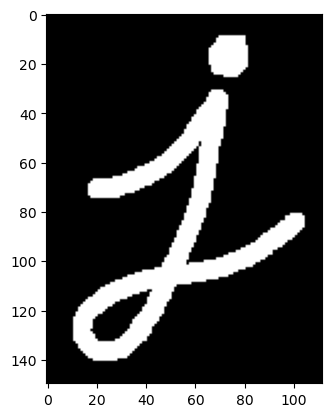

In [74]:
E_r = cv2.erode(np.float32(img_N),K_r)
O_r2 = cv2.dilate(E_r,K_r)
plt.imshow(O_r2,cmap='gray')

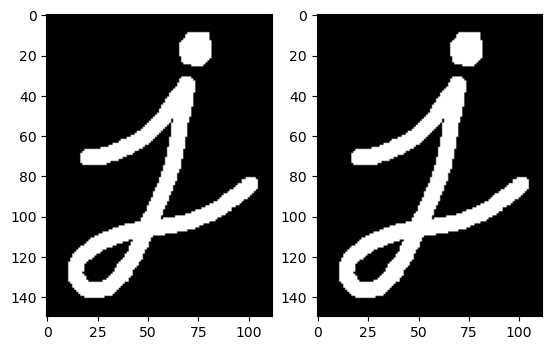

In [80]:
plt.subplot(121)
plt.imshow(O_r,cmap='gray')
plt.subplot(122)
plt.imshow(O_r2,cmap='gray')

# BlackHat

In [129]:
BH_c = cv2.morphologyEx(E_r,cv2.MORPH_BLACKHAT,K_c)

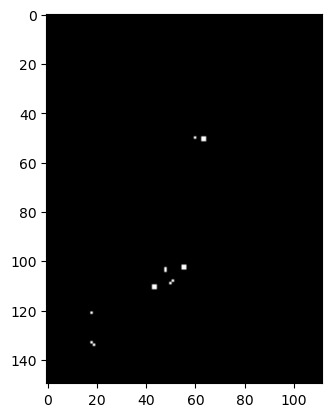

In [131]:
plt.imshow(BH_c,cmap='gray')

# TopHat

In [133]:
TH_c = cv2.morphologyEx(E_r,cv2.MORPH_TOPHAT,K_c)

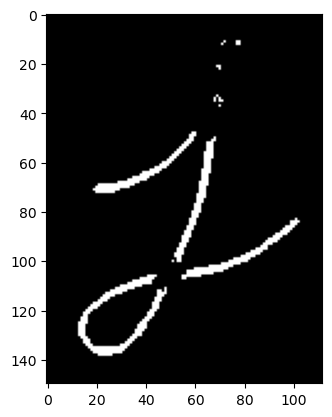

In [135]:
plt.imshow(TH_c,cmap='gray')